In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop    # Tối ưu
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical  # Sử dụng để làm nổi đối tượng cần phân loại
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import pickle
import math as m

In [3]:
load_train_data='/content/drive/MyDrive/AI/KhuonMat/'

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10, 
                             zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1))

In [23]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'training',
    shuffle = True
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'validation',
    shuffle = True
    )

Found 210 images belonging to 7 classes.
Found 42 images belonging to 7 classes.


In [24]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'Anh': 0, 'Cuong': 1, 'GiaHuy': 2, 'LocLien': 3, 'LongBui': 4, 'TanLoc': 5, 'Thang': 6}
{'Anh': 0, 'Cuong': 1, 'GiaHuy': 2, 'LocLien': 3, 'LongBui': 4, 'TanLoc': 5, 'Thang': 6}


In [25]:
drive.mount('/content/drive',force_remount=True)
Anh_dir='/content/drive/MyDrive/AI/KhuonMat/Anh/'
Cuong_dir='/content/drive/MyDrive/AI/KhuonMat/Cuong/'
Giahuy_dir='/content/drive/MyDrive/AI/KhuonMat/GiaHuy/'
Loclien_dir='/content/drive/MyDrive/AI/KhuonMat/LocLien/'
Longbui_dir='/content/drive/MyDrive/AI/KhuonMat/LongBui/'
Tanloc_dir='/content/drive/MyDrive/AI/KhuonMat/TanLoc/'
Thang_dir='/content/drive/MyDrive/AI/KhuonMat/Thang/'

anh_files = os.listdir(Anh_dir)
print(anh_files[:30])

cuong_files = os.listdir(Cuong_dir)
print(cuong_files[:30])

huy_files = os.listdir(Giahuy_dir)
print(huy_files[:30])

loclien_files = os.listdir(Loclien_dir)
print(loclien_files[:30])

long_files = os.listdir(Longbui_dir)
print(long_files[:30])

loctan_files = os.listdir(Tanloc_dir)
print(loctan_files[:30])

thang_files = os.listdir(Thang_dir)
print(thang_files[:30])

Mounted at /content/drive
['ANH 2.jpg', 'ANH 1.jpg', 'ANH 5.jpg', 'ANH 3.jpg', 'ANH 6.jpg', 'ANH 4.jpg', 'ANH 9.jpg', 'ANH 8.jpg', 'ANH 7.jpg', 'ANH 10.jpg', 'ANH 11.jpg', 'ANH 12.jpg', 'ANH 13.jpg', 'ANH 14.jpg', 'ANH 17.jpg', 'ANH 15.jpg', 'ANH 16.jpg', 'ANH 18.jpg', 'ANH 20.jpg', 'ANH 19.jpg', 'ANH 21.jpg', 'ANH 24.jpg', 'ANH 25.jpg', 'ANH 26.jpg', 'ANH 22.jpg', 'ANH 23.jpg', 'ANH 27.jpg', 'ANH 28.jpg', 'ANH 29.jpg', 'ANH 30.jpg']
['Cuong4.jpg', 'Cuong0.jpg', 'Cuong1.jpg', 'Cuong6.jpg', 'Cuong7.jpg', 'Cuong8.jpg', 'Cuong12.jpg', 'Cuong13.jpg', 'Cuong14.jpg', 'Cuong16.jpg', 'Cuong16 (1).jpg', 'Cuong15.jpg', 'Cuong18.jpg', 'Cuong19.jpg', 'Cuong20.jpg', 'Cuong21.jpg', 'Cuong22.jpg', 'Cuong23.jpg', 'Cuong25.jpg', 'Cuong26.jpg', 'Cuong24.jpg', 'Cuong11.jpg', 'Cuong28.jpg', 'Cuong27.jpg', 'Cuong29.jpg', 'Cuong10.jpg', 'Cuong2.jpg', 'Cuong5.jpg', 'Cuong3.jpg', 'Cuong9.jpg']
['HUY 4.jpg', 'HUY 6.jpg', 'HUY 2.jpg', 'HUY 1.jpg', 'HUY 3.jpg', 'HUY 5.jpg', 'HUY 15.jpg', 'HUY 12.jpg', 'HUY 16.jp

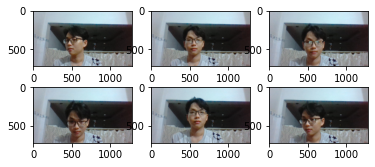

In [26]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/KhuonMat/Cuong/'
for i in range(6):
  plt.subplot(330+i+1)
  filename = folder + 'Cuong' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [27]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=20,verbose=1,validation_data=validation_set)

Epoch 1/20
53/53 [==============================] - 77s 1s/step - loss: 11.4227 - accuracy: 0.3095 - val_loss: 3.6995 - val_accuracy: 0.1429
Epoch 2/20
53/53 [==============================] - 77s 1s/step - loss: 2.2043 - accuracy: 0.3571 - val_loss: 1.9061 - val_accuracy: 0.3571
Epoch 3/20
53/53 [==============================] - 75s 1s/step - loss: 1.6455 - accuracy: 0.5810 - val_loss: 2.1418 - val_accuracy: 0.2857
Epoch 4/20
53/53 [==============================] - 77s 1s/step - loss: 0.4959 - accuracy: 0.9000 - val_loss: 1.3603 - val_accuracy: 0.4762
Epoch 5/20
53/53 [==============================] - 76s 1s/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.6268 - val_accuracy: 0.4762
Epoch 6/20
53/53 [==============================] - 75s 1s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.2156 - val_accuracy: 0.5238
Epoch 7/20
53/53 [==============================] - 76s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.2876 - val_accuracy: 0.4762
Epoch 8/20
53/53 [=

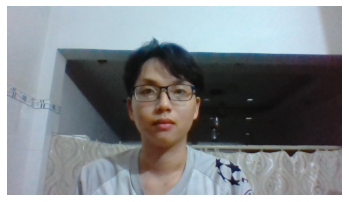

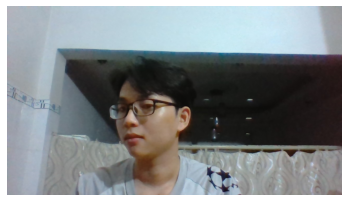

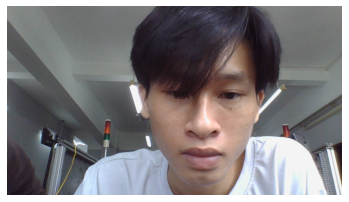

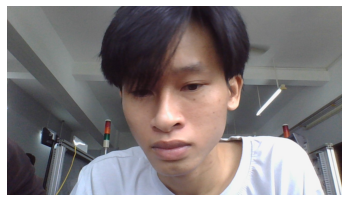

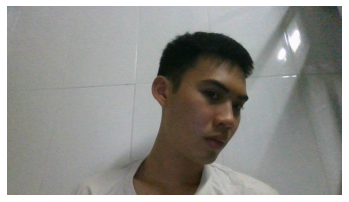

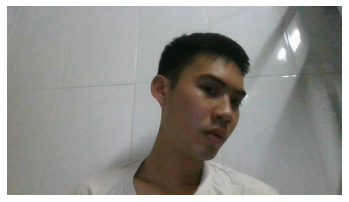

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dau = [os.path.join(Cuong_dir, fname) 
                for fname in cuong_files[pic_index-2:pic_index]]
next_xoai = [os.path.join(Thang_dir, fname) 
                for fname in thang_files[pic_index-2:pic_index]]
next_bo = [os.path.join(Anh_dir, fname) 
                for fname in anh_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dau+next_xoai+next_bo):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(499, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 49, 49, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 23, 23, 64)      

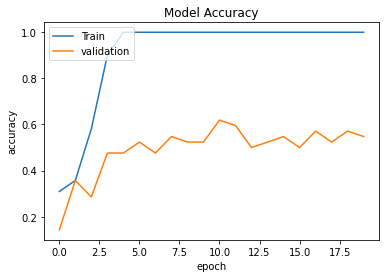

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [31]:
model.save('/content/drive/MyDrive/AI/phanloaikhuonmat.h5')

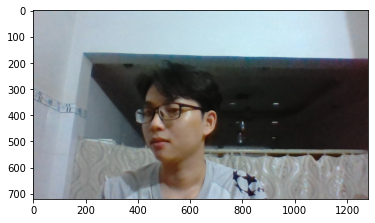

cuong


In [34]:
filename = '/content/drive/MyDrive/AI/TestKhuonMat/Cuong.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('anh')
elif kq ==1:
  print('loctan')
elif kq ==2:
  print('huy')
elif kq ==3:
  print('loclien')
elif kq ==4:
  print('long')
elif kq ==5:
  print('cuong')
elif kq ==6:
  print('thang')

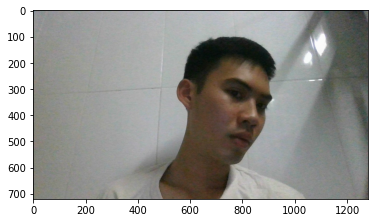

anh


In [36]:
filename = '/content/drive/MyDrive/AI/TestKhuonMat/Anh.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('cuong')
elif kq ==1:
  print('loctan')
elif kq ==2:
  print('huy')
elif kq ==3:
  print('loclien')
elif kq ==4:
  print('long')
elif kq ==5:
  print('anh')
elif kq ==6:
  print('thang')